# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [259]:
# stundent details example: John S. 9812 
#                       student details 1: Eric R. 3160
# (if exists)           student details 2: Matan K. 0415
# (if exists)           student details 3: Lior Z. 5873
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT 4.0
Goal: To perform initial exploratory data analysis and understand the relationships between features and the target variable (median house value).

Propmpt1:
Can you help me analyze the California Housing dataset for a regression problem? I want to understand feature-target relationships and correlations.

Propmpt2:
Which features are most correlated with the target variable in this dataset? Should I visualize them?

Propmpt3:
Can you suggest some visualizations and preprocessing steps for this dataset? 


AI agent name: Claude
Goal: I'm working on a classification problem where I need to predict and analyze House-pricing.
Propmpt1: Which classification algorithms would you recommend comparing for this classification task?

Propmpt2: What are their respective strengths and limitations specifically for housing data?

Propmpt3: What approach would you recommend for incorporating the geographic coordinates into the models you suggested?    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:
  
This assignment uses the California Housing dataset which contains information about housing in California.
The target variable is the median house value for California districts in hundreds of thousands of dollars.
The dataset includes features like median income, house age, average rooms, and geographical information.
Our task is to build a regression model that predicts median house values using various feature engineering
techniques and machine learning algorithms with hyperparameter tuning.

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
The target variable in this learning problem is the median house value for various California districts, expressed in units of $100,000. This means that a value of 2.5 in the dataset corresponds to a median house value of $250,000. This variable represents the output that the model aims to predict based on a set of input features, such as median income, housing age, population, and other demographic and geographic data. By training on these features, the model learns patterns and relationships that can help estimate housing prices in areas where such data might not be readily available or to support decision-making in housing policy, real estate investment, or urban planning.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDRegressor

In [266]:
import pandas as pd

df_train = pd.read_csv("housing_train.csv")
df_test = pd.read_csv("housing_test.csv")

In [267]:
print("Train dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)

print("\nFirst 5 rows of train dataset:")
display(df_train.head())

print("\nFirst 5 rows of test dataset:")
display(df_test.head())

Train dataset shape: (16512, 9)
Test dataset shape: (4128, 9)

First 5 rows of train dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250



First 5 rows of test dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


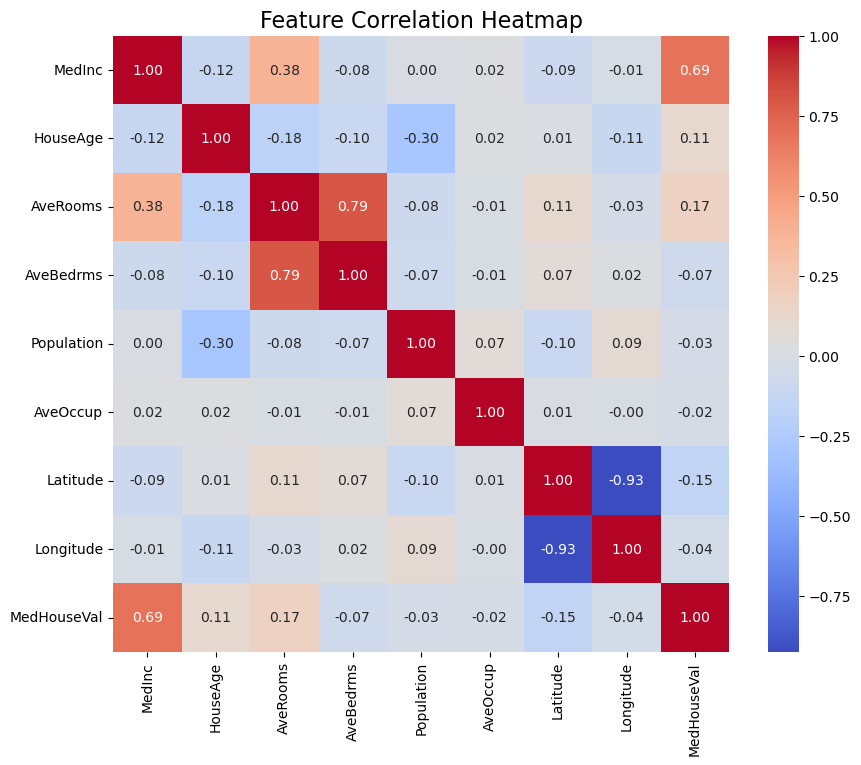

In [268]:
# Compute correlation matrix
corr_matrix = df_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

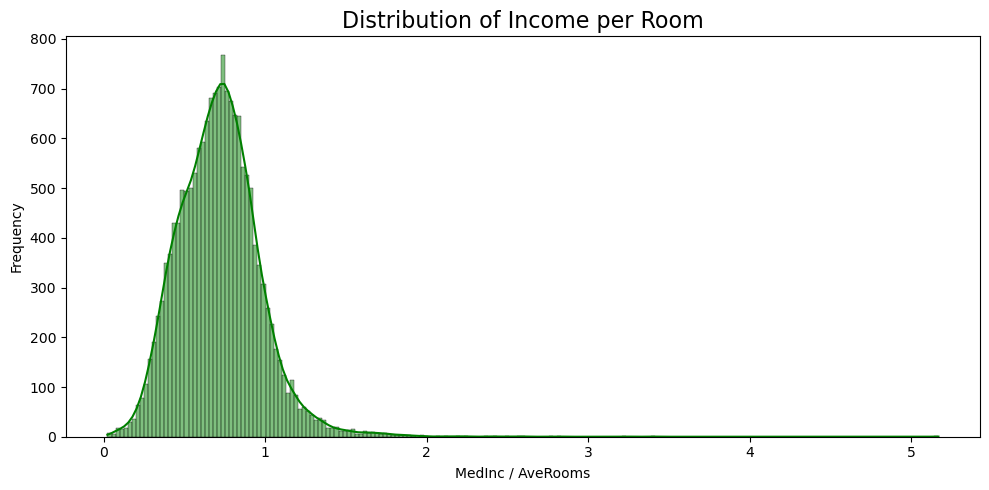

In [269]:
# יצירת עותק זמני של הסדרה רק לצורך גרף
income_per_room = df_train['MedInc'] / df_train['AveRooms']

plt.figure(figsize=(10, 5))
sns.histplot(income_per_room, kde=True, color='green')
plt.title("Distribution of Income per Room", fontsize=16)
plt.xlabel("MedInc / AveRooms")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


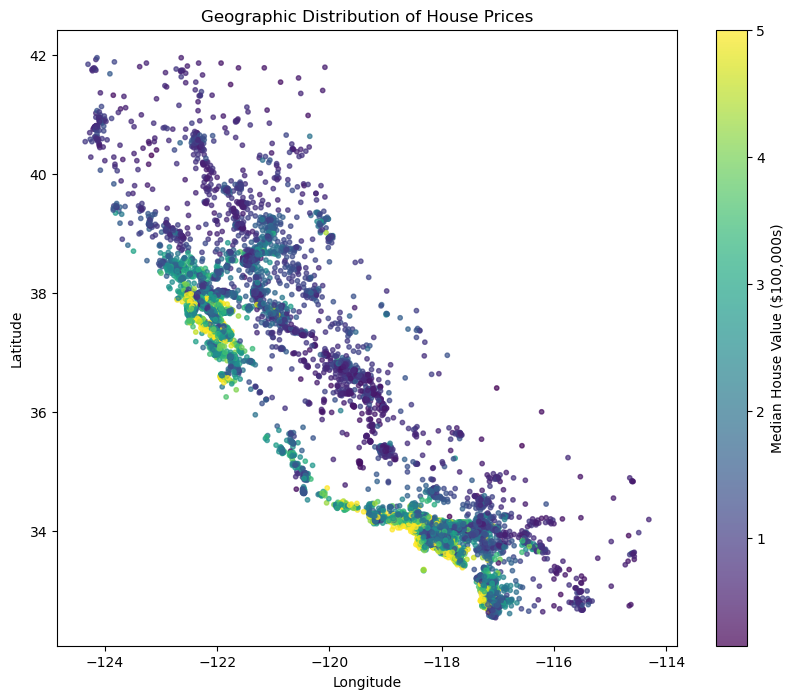

In [270]:
plt.figure(figsize=(10, 8))
plt.scatter(df_train['Longitude'], df_train['Latitude'], 
            c=df_train['MedHouseVal'], cmap='viridis', 
            s=10, alpha=0.7)
plt.colorbar(label='Median House Value ($100,000s)')
plt.title('Geographic Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [271]:
print("\nTrain dataset statistics:")
display(df_train.describe())


Train dataset statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Part 3 - Experiments
You could add as many code cells as needed

In [273]:
# Define target and features
target = 'MedHouseVal'
X = df_train.drop(columns=[target])
y = df_train[target]

# Identify column types
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Transformers
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

poly_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

# Feature engineering options
feature_eng_permutations = {
    'basic': ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]),
    'poly': ColumnTransformer([
        ('num', poly_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])
}

# Linear Regression and Gradient Descent
models = {
    'LinearRegression': (LinearRegression(), {}),
    'SGDRegressor': (
        SGDRegressor(random_state=42, max_iter=1000, tol=1e-3),
        {
            'model__alpha': [0.0001, 0.001, 0.01],       # regularization strength
            'model__penalty': ['l2', 'l1'],              # type of regularization
            'model__learning_rate': ['constant', 'optimal']
        }
    )
}

# Initialize result storage
summary_results = []
fold_results = []

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Main loop
for fe_name, transformer in feature_eng_permutations.items():
    for model_name, (model, param_grid) in models.items():
        print(f"Running: {fe_name} + {model_name}")
        
        pipe = Pipeline([
            ('preprocessor', transformer),
            ('model', model)
        ])
        
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=kf, scoring='r2', return_train_score=True, n_jobs=-1)
        grid.fit(X, y)

        for i in range(len(grid.cv_results_['params'])):
            summary_results.append({
                'Feature_Engineering': fe_name,
                'Model': model_name,
                'Params': grid.cv_results_['params'][i],
                'Mean_Train_R2': grid.cv_results_['mean_train_score'][i],
                'Mean_Val_R2': grid.cv_results_['mean_test_score'][i],
                'Std_Val_R2': grid.cv_results_['std_test_score'][i]
            })

        best_model = grid.best_estimator_
        fold_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')
        
        for fold_idx, score in enumerate(fold_scores):
            fold_results.append({
                'Feature_Engineering': fe_name,
                'Model': model_name,
                'Best_Params': grid.best_params_,
                'Fold': fold_idx + 1,
                'R2_Score': round(score, 4)
            })

# Convert to DataFrames
fold_df = pd.DataFrame(fold_results)
summary_df = pd.DataFrame(summary_results)
summary_df = summary_df.sort_values(by='Mean_Val_R2', ascending=False).reset_index(drop=True)

# Mark best combo
best_idx = summary_df['Mean_Val_R2'].idxmax()
summary_df['Best'] = ['V' if i == best_idx else '' for i in summary_df.index]
best_combo = summary_df.loc[best_idx, ['Feature_Engineering', 'Model']]

# Display fold results
print("\n Fold-by-Fold R² Scores:")
display(fold_df)

# Display summary results
print("\n Summary of GridSearchCV Results:")
pd.set_option('display.max_colwidth', None)
display(summary_df)

# Best result
print("\n Best Overall Combination:")
print(summary_df.iloc[0])

Running: basic + LinearRegression
Running: basic + SGDRegressor
Running: poly + LinearRegression
Running: poly + SGDRegressor

 Fold-by-Fold R² Scores:


,Feature_Engineering,Model,Best_Params,Fold,R2_Score
0,basic,LinearRegression,{},1,6.051000e-01
1,basic,LinearRegression,{},2,6.176000e-01
2,basic,LinearRegression,{},3,6.147000e-01
3,basic,LinearRegression,{},4,5.884000e-01
4,basic,LinearRegression,{},5,5.997000e-01
5,basic,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l2'}",1,-1.208171e+20
6,basic,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l2'}",2,5.644000e-01
7,basic,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l2'}",3,-1.658790e+17
8,basic,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l2'}",4,5.357000e-01
9,basic,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l2'}",5,5.574000e-01



 Summary of GridSearchCV Results:


,Feature_Engineering,Model,Params,Mean_Train_R2,Mean_Val_R2,Std_Val_R2,Best
0,basic,LinearRegression,{},6.062920e-01,6.050992e-01,1.053596e-02,V
1,poly,LinearRegression,{},6.812450e-01,4.935819e-01,1.507521e-01,
2,basic,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l2'}",-4.922787e+19,-2.419659e+19,4.831029e+19,
3,basic,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l1'}",-1.062979e+20,-1.043479e+20,1.625433e+20,
4,basic,SGDRegressor,"{'model__alpha': 0.001, 'model__learning_rate': 'optimal', 'model__penalty': 'l1'}",-1.810453e+22,-1.115111e+22,2.045788e+22,
5,basic,SGDRegressor,"{'model__alpha': 0.0001, 'model__learning_rate': 'optimal', 'model__penalty': 'l1'}",-9.795779e+23,-1.580919e+22,1.749186e+22,
6,poly,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l2'}",-2.048652e+22,-3.666552e+22,5.473612e+22,
7,basic,SGDRegressor,"{'model__alpha': 0.01, 'model__learning_rate': 'constant', 'model__penalty': 'l2'}",-1.555224e+23,-3.695984e+22,3.020009e+22,
8,basic,SGDRegressor,"{'model__alpha': 0.001, 'model__learning_rate': 'optimal', 'model__penalty': 'l2'}",-1.193941e+22,-4.831043e+22,9.569045e+22,
9,basic,SGDRegressor,"{'model__alpha': 0.001, 'model__learning_rate': 'constant', 'model__penalty': 'l2'}",-2.303304e+23,-5.913355e+22,5.847449e+22,



 Best Overall Combination:
Feature_Engineering               basic
Model                  LinearRegression
Params                               {}
Mean_Train_R2                  0.606292
Mean_Val_R2                    0.605099
Std_Val_R2                     0.010536
Best                                  V
Name: 0, dtype: object


In [274]:
#### Model Selection Criteria Explained

#| **Criterion**               | **Explanation**                                                                                              |
#|----------------------------|--------------------------------------------------------------------------------------------------------------|
# Highest `Mean_Val_R2`    | This is the most important metric – the validation accuracy, which reflects the model's generalization ability on unseen data. |
#| Lowest `Std_Val_R2`     | A stability measure – shows how consistent the performance is across folds. The lower the standard deviation, the more reliable the model. |
#| Reasonable `Mean_Train_R2` | Not necessarily the highest, but still good. We don’t want the model to overfit (memorize) the training data. |


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [276]:

best_fe = summary_df.loc[best_idx, 'Feature_Engineering']
best_model_name = summary_df.loc[best_idx, 'Model']

print(f"\nTraining final model on full data: {best_fe} + {best_model_name}")

final_transformer = feature_eng_permutations[best_fe]
final_model_class, best_params = models[best_model_name]

final_model = final_model_class.set_params(**{
    k.replace('model__', ''): v for k, v in best_params.items()
})

final_pipeline = Pipeline([
    ('preprocessor', final_transformer),
    ('model', final_model)
])

final_pipeline.fit(X, y)
print("✅ Final model trained on full training data.")



Training final model on full data: basic + LinearRegression
✅ Final model trained on full training data.


## Part 5 - Apply on test and show model performance estimation

In [278]:

X_test = df_test.drop(columns=[target])
y_test = df_test[target]

y_pred_test = final_pipeline.predict(X_test)

print("\n🔎 First 5 predictions on test set:")
for i in range(5):
    print(f"Prediction: {y_pred_test[i]:.3f} | Actual: {y_test.iloc[i]:.3f}")

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"\n📊 Model Performance on Test Set:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")





🔎 First 5 predictions on test set:
Prediction: 3.095 | Actual: 3.852
Prediction: 2.950 | Actual: 2.457
Prediction: 2.863 | Actual: 2.013
Prediction: 1.437 | Actual: 1.052
Prediction: 0.329 | Actual: 1.078

📊 Model Performance on Test Set:
R² Score: 0.6041
Mean Squared Error (MSE): 0.5371
